# Importing the needed Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

# Getting the Dataset

In [2]:
df = pd.read_csv("Train.csv")

# Brief description of the Data and its variables

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape

(891, 12)

##### The data set contains 891 rows and 8 columns.

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### The age column has 177 missing values, this was handled later, while the cabin with 687 missing values was dropped, as more than 50% of the column is missing.

# Exploratory Data Analyses

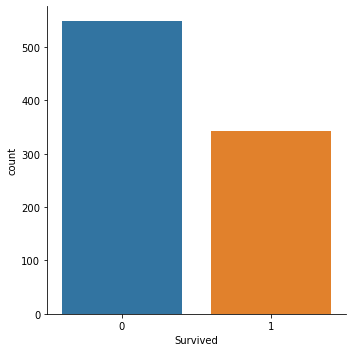

In [7]:
sns.catplot(data = df, x = 'Survived', kind = 'count')

0 - Did not survive

1 - Survived

### From the bar chart, we can clearly see that there were more casualties than survivors. 

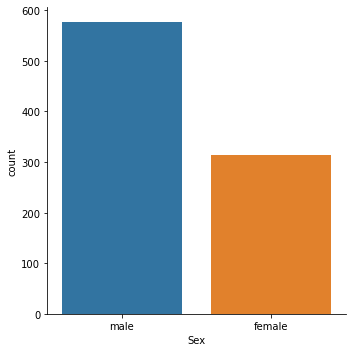

In [8]:
sns.catplot(data = df, x = 'Sex', kind = 'count')

### They were more male passengers in comparison with their female counterparts

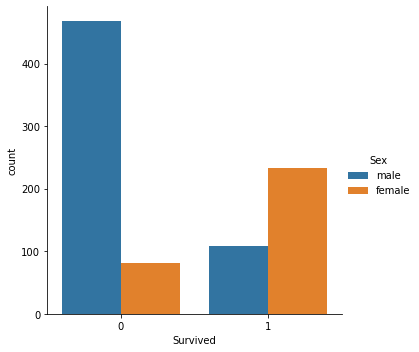

In [9]:
sns.catplot(data = df, x = 'Survived', kind = 'count', hue = 'Sex')

### From the charts, we could deduce that they were more male casualties than women, with more female survivors.

##### History i.e from the movies and books, it said that the music group, which consisted of more men, continued playing while the ship sank, also women were given priority due to the shortage of life boats. From all these, we can see why we have more male casualties

### To get more insights into the various age groups on board the Titanic, I applied BINNING, to group the ages into four different bins as follows:

0-18 are classified as Children


19-29 are classified as Youths


30-59 as Adults and;


60 and above as aged.

In [10]:
bins = np.linspace(min(df['Age']), max(df['Age']), 5)
group_names = ['Children', 'Youths', 'Adults', 'Aged']
bins = [0, 18, 29, 59, 120]
df['Age_group'] = pd.cut(df['Age'], bins, labels = group_names, include_lowest = True)

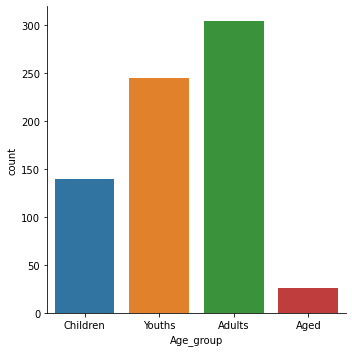

In [11]:
sns.catplot(data = df, x = "Age_group", kind = 'count')

#### From the newly created age_groups, the chart above showed that they were more adults, closely followed by youths, children came in 3rd, and we had less than 50 aged persons on board.

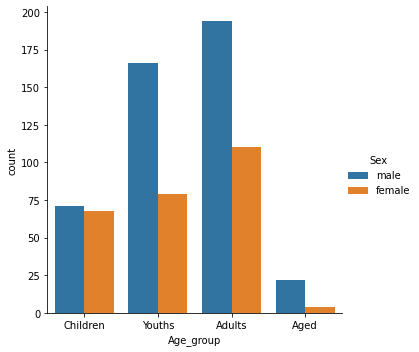

In [12]:
sns.catplot(data = df, x = "Age_group", kind = 'count', hue = 'Sex')

Adding a filter (Sex) to the chart above, we can see the distribution of individuals by Sex.

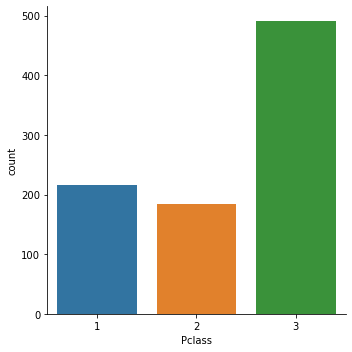

In [13]:
sns.catplot(data = df, x = "Pclass", kind = 'count')

#### Pclass; This shows the cabins/classes on the Titanic were divided into 3, First class(1), Second class(2) and Third class(3), this was based on prices of the tickets

##### Third class had more passengers, followed by first class and second class, though there was not much difference between the first and second class.

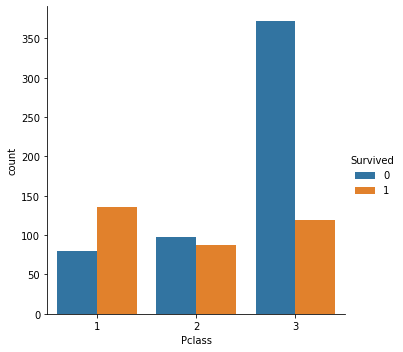

In [14]:
sns.catplot(data = df, x = 'Pclass', kind = 'count', hue = "Survived")

##### Adding a filter(Survived), it shows they were less survivors in 3rd class, more than 50% of passengers did not survive, the highest percantage difference in comparison with other classes. They were more survivors from first class than any other class.

### Embarked; Port of Embarktion.

c = Cherbourg

Q = Queenstown

D = Southampton

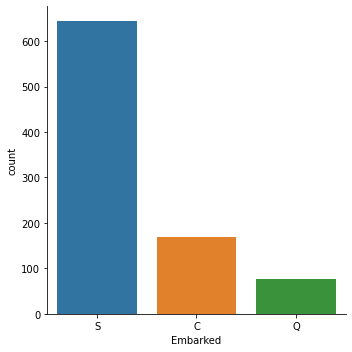

In [15]:
sns.catplot(data = df, x = 'Embarked', kind = 'count')

#### Southampton was the most popular Port with over 50% of the passengers embarking at Southampton

# A Correlation Table

In [16]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# Data Wrangling, Modelling and Training

##### Converting categorical variables to numerical, using get dummies.

In [17]:
sex = pd.get_dummies(df['Sex'], drop_first = True)
embark = pd.get_dummies(df['Embarked'], drop_first = True)

##### After converting, I dropped the old columns and concatenated the new (numerical) columns.

In [18]:
df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [19]:
df.drop(['Cabin'], axis = 1, inplace = True)

In [20]:
train = pd.concat([df, sex, embark], axis = 1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_group,male,Q,S
0,1,0,3,22.0,1,0,7.2500,Youths,1,0,1
1,2,1,1,38.0,1,0,71.2833,Adults,0,0,0
2,3,1,3,26.0,0,0,7.9250,Youths,0,0,1
3,4,1,1,35.0,1,0,53.1000,Adults,0,0,1
4,5,0,3,35.0,0,0,8.0500,Adults,1,0,1


In [21]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
Age_group      177
male             0
Q                0
S                0
dtype: int64

### Using a box plot of Pclass plotted against age, I was able to determine the average age of passengers in each class, then used a function to to fill each missing values with the average age of the class they belong to.

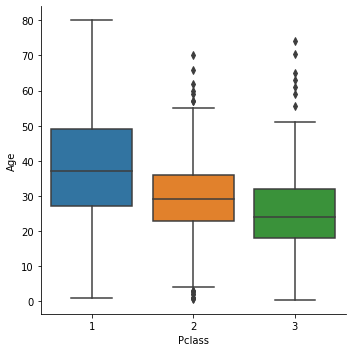

In [22]:
sns.catplot(data = df, x = 'Pclass', y = 'Age', kind = 'box')

In [23]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
        
    else:
        return Age
        

In [24]:
train["Age"] = train[['Age', 'Pclass']].apply(input_age, axis = 1)

In [25]:
bins = np.linspace(min(df['Age']), max(df['Age']), 5)
group_names = ['Children', 'Youths', 'Adults', 'Aged']
bins = [0, 18, 29, 59, 120]
df['Age_group'] = pd.cut(df['Age'], bins, labels = group_names, include_lowest = True)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Age          891 non-null    float64 
 4   SibSp        891 non-null    int64   
 5   Parch        891 non-null    int64   
 6   Fare         891 non-null    float64 
 7   Age_group    714 non-null    category
 8   male         891 non-null    uint8   
 9   Q            891 non-null    uint8   
 10  S            891 non-null    uint8   
dtypes: category(1), float64(2), int64(5), uint8(3)
memory usage: 52.5 KB


In [27]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_group,male,Q,S
0,1,0,3,22.0,1,0,7.2500,Youths,1,0,1
1,2,1,1,38.0,1,0,71.2833,Adults,0,0,0
2,3,1,3,26.0,0,0,7.9250,Youths,0,0,1
3,4,1,1,35.0,1,0,53.1000,Adults,0,0,1
4,5,0,3,35.0,0,0,8.0500,Adults,1,0,1


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Age          891 non-null    float64 
 4   SibSp        891 non-null    int64   
 5   Parch        891 non-null    int64   
 6   Fare         891 non-null    float64 
 7   Age_group    714 non-null    category
 8   male         891 non-null    uint8   
 9   Q            891 non-null    uint8   
 10  S            891 non-null    uint8   
dtypes: category(1), float64(2), int64(5), uint8(3)
memory usage: 52.5 KB


# Data is cleaned and ready.

## DATA  PREPROCESSING

In [29]:
x = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]
y = df['Survived']

In [30]:
#train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split (x,y,test_size=1/3, random_state = 0)

In [31]:
x_train.shape

(594, 8)

In [32]:
y_train.shape

(594,)

In [33]:
x_train = x_train.values.reshape(1, -1)
y_train = y_train.values.reshape(1, -1)

In [34]:
x_test = x_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test= train_test_split (x,y,test_size=0.3,random_state=42)

# Machine Learning Algorithms

I applied various methods to see which model has the highest accuracy.

# Algorithm/ Model 1: Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter = 2000)
classifier.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

In [37]:
y_pred = classifier.predict(x_test)

In [38]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [39]:
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test, y_pred)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)

Accuracy:  0.8134328358208955
Precision:  0.801980198019802
Recall:  0.7297297297297297
ROC AUC (array([0.        , 0.12738854, 1.        ]), array([0.        , 0.72972973, 1.        ]))


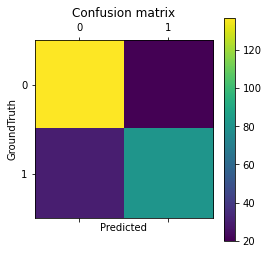

[[137  20]
 [ 30  81]]


In [40]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc= (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,y_pred,"conf")

# Algorithm/ Model 2 : Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [42]:
y_pred = classifier.predict(x_test)

In [43]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Accuracy:  0.7947761194029851
Precision:  0.7545454545454545
Recall:  0.7477477477477478


In [44]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)

ROC AUC 0.787886612727377


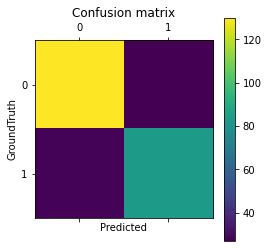

[[130  27]
 [ 28  83]]


In [45]:
conftable(y_test,y_pred,"conf")

In [46]:
pd.Series(y_test).value_counts()

0    157
1    111
Name: Survived, dtype: int64

### Algorithm/ Model 3 : Random Forest 

In [47]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 2000, criterion = 'entropy')
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=2000)

Accuracy:  0.7947761194029851
Precision:  0.7545454545454545
Recall:  0.7477477477477478
ROC AUC 0.787886612727377


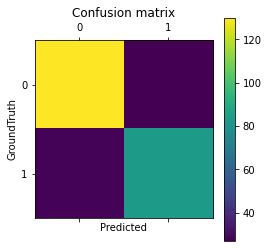

[[130  27]
 [ 28  83]]


In [48]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,y_pred,"conf")

### Extra Algorithm/ Model 4 : XGBoost

In [49]:
#pip install xgboost

In [50]:
import xgboost as xgb
from xgboost import XGBClassifier

xgboost = XGBClassifier()
xgb = xgboost.fit( x_train, y_train)
y_pred = xgb.predict(x_test)

Accuracy:  0.8097014925373134
Precision:  0.7777777777777778
Recall:  0.7567567567567568
ROC AUC 0.8019452573592701


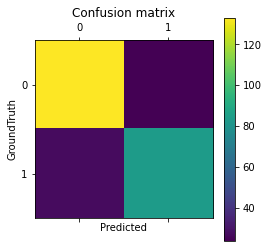

[[133  24]
 [ 27  84]]


In [51]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,y_pred,"conf")

In [52]:
# pip install catboost

In [53]:
from catboost import Pool, CatBoostClassifier

catboost = CatBoostClassifier(random_seed = 1000, iterations = 100)
cat = catboost.fit( x_train, y_train)
y_pred = cat.predict(x_test)

Learning rate set to 0.069531
0:	learn: 0.6672653	total: 57.1ms	remaining: 5.66s
1:	learn: 0.6460387	total: 62.9ms	remaining: 3.08s
2:	learn: 0.6247994	total: 71.6ms	remaining: 2.31s
3:	learn: 0.6083764	total: 73.6ms	remaining: 1.77s
4:	learn: 0.5908373	total: 75.7ms	remaining: 1.44s
5:	learn: 0.5747877	total: 78.1ms	remaining: 1.22s
6:	learn: 0.5598261	total: 80.3ms	remaining: 1.07s
7:	learn: 0.5476956	total: 82ms	remaining: 943ms
8:	learn: 0.5363846	total: 84.4ms	remaining: 853ms
9:	learn: 0.5244081	total: 86.6ms	remaining: 780ms
10:	learn: 0.5158964	total: 89.3ms	remaining: 723ms
11:	learn: 0.5075148	total: 91.5ms	remaining: 671ms
12:	learn: 0.4980897	total: 93.7ms	remaining: 627ms
13:	learn: 0.4898743	total: 95.9ms	remaining: 589ms
14:	learn: 0.4833115	total: 98.2ms	remaining: 556ms
15:	learn: 0.4766326	total: 101ms	remaining: 531ms
16:	learn: 0.4704849	total: 107ms	remaining: 520ms
17:	learn: 0.4645382	total: 110ms	remaining: 499ms
18:	learn: 0.4593139	total: 114ms	remaining: 488m

In [54]:
from catboost.utils import get_confusion_matrix
model = CatBoostClassifier(loss_function = 'MultiClass', iterations = 2000, verbose = False)
model.fit(x_train, y_train)

Accuracy:  0.8134328358208955
Precision:  0.8588235294117647
Recall:  0.6576576576576577
ROC AUC 0.7906122683192748


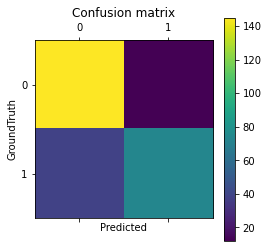

[[145  12]
 [ 38  73]]


In [55]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,y_pred,"conf")

<AxesSubplot:>

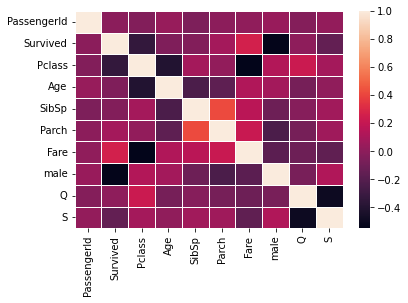

In [56]:
sns.heatmap(train.corr(), linewidths = 1)

#### From the heat map, we can see that Fare had the highest effect on survival rate

In [57]:
df.to_csv('titanic')